In [1]:
#Part2 Project 2 MCMC sampling for parameters


import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
import pandas as pd
frbs = pd.read_csv('C:/Users/lovy1/OneDrive/Desktop/frb.csv')

In [3]:
Ωb=0.02237
χ=0.88
G=6.67408e-11
mₚ=1.6726219e-27
c=299792458
f=0.84
dh= 0.1
h=0.001
H0=0.64








#for generating liklihood function

def sigma(z):
    return np.sqrt((50 / (1 + z))**2 + (40 + 140 * z)**2)
def DMLSS(z,h,H0,Ωm):
    x=np.arange(0,z,h)
    one=np.ones(len(x))
    E=np.sqrt(Ωm*((one + x)**3) + (one*((H0/100)**2-Ωm)))
    return sum(((χ*f*3*100*c*Ωb*H0)/(8*np.pi*mₚ*G))*((one + x)/E)*h*(1.05026504028913e-42))
def DMhost1(z):
    return 100*(( 1 + z )**(-1))


dh= 0.1
H = np.arange(10,110,dh)
h=0.001

#Probablity distribution function for H
def PDF(Ωm,H,z,h,DMo,Ωb):
    sigma1 = sigma(z)
    n = len(z)
    pdf=[]
    for i in range(0,len(H)):
        o=H[i]
        L=[]
        for j in range(0,n):
            L.append((1/(np.sqrt(2*np.pi*sigma1[j]**2)))*(np.exp((-(DMo[j]-DMLSS(z[j],h,H[i],Ωm)-DMhost1(z[j]))**2)/(2*sigma1[j]**2))))
        pdf.append(np.prod(L))
    return pdf

#log liklihood
def llhood(params,z,h,DMo,Ωb):
    H,Ωm,DMhost=params
    sigma1 = sigma(z)
    n = len(z)
    L=[]
    for j in range(0,n):
        L.append((1/(np.sqrt(2*np.pi*sigma1[j]**2)))*(np.exp((-(DMo[j]-DMLSS(z[j],h,H,Ωm)-DMhost*(( 1 + z )**(-1)))**2)/(2*sigma1[j]**2))))
    return np.sum(np.log(L))



In [4]:
z=np.asarray(frbs.redshift)
DMo=np.asarray(frbs.DM_obs)-np.asarray(frbs.DM_MW)

In [5]:
frbs

,redshift,DM_obs,DM_MW,name
0,0.03370,348.80,199.0,FRB180916
1,0.11780,338.70,37.2,FRB190608
2,0.19273,558.00,188.0,FRB121102
3,0.29100,363.60,57.3,FRB190102
4,0.32140,361.42,40.5,FRB180924
5,0.37800,321.40,57.8,FRB190611
6,0.47550,589.27,102.0,FRB181112
7,0.52200,593.10,56.4,FRB190711
8,0.66000,760.80,37.0,FRB190523


In [6]:
#creating log prior function for variables

def log_prior(params):
    H,Ωm,DMhost=params
    if 0.05 < Ωm < 0.25 and 0 < H < 1.5 and -100 < DMhost < 500:
        return 5.0
    return -np.inf
def log_probability(params,z,h,DMo,Ωb):
    lp=log_prior(params)
    if not np.isfinite(lp):
        return -np.inf
    return lp + llhood(params,z,h,DMo,Ωb)

    
    
    

In [7]:
#Doing MCMC sampling for frb original data

import emcee

pos = (0.64,0.143,100)+[0.01,0.01,1]*np.random.randn(100,3)
no_of_walkers, dm=pos.shape
sampler=emcee.EnsembleSampler(no_of_walkers, dm, log_probability, args=(z,h,DMo,Ωb) )
sampler.run_mcmc(pos,2000,progress=True)

100%|██████████████████████████████████████████████████████████████████████████████████████| 2000/2000 [04:49<00:00,  6.90it/s]


State([[ 3.88747614e-01  1.76255559e-01  1.33593337e+01]
 [ 1.79955447e-01  5.64294480e-02  5.77196752e+01]
 [ 3.53641289e-01  1.99316450e-01  5.56787709e+01]
 [ 4.76915654e-01  2.04808709e-01 -6.85678840e+01]
 [ 3.02749520e-01  8.48429586e-02 -3.41120733e+01]
 [ 3.59861264e-01  1.69557513e-01  2.62969900e+01]
 [ 1.74706109e-01  5.00301987e-02  6.05318444e+01]
 [ 3.53533663e-01  1.97343215e-01  4.34948708e+01]
 [ 4.22265197e-01  1.97110693e-01 -1.20857100e+01]
 [ 4.40192393e-01  2.16072394e-01 -1.13975303e+01]
 [ 2.74057320e-01  9.88372717e-02  3.10943017e+00]
 [ 3.23584580e-01  1.64072848e-01  4.11370293e+01]
 [ 4.21142926e-01  2.46265951e-01  3.48612985e+01]
 [ 3.59546233e-01  1.61796514e-01  2.16540955e+01]
 [ 3.16349621e-01  1.18922843e-01 -5.07383628e+00]
 [ 1.97440389e-01  6.22034549e-02  7.42722803e+01]
 [ 4.67989139e-01  2.28012452e-01 -1.17557083e+01]
 [ 4.35346850e-01  2.38081222e-01 -4.52082910e-01]
 [ 4.42415037e-01  2.40697521e-01  1.75242743e+00]
 [ 2.96209352e-01  1.4802

In [8]:
flat_samples = sampler.get_chain(discard=50, thin=40, flat=True)
print(flat_samples.shape)

(4800, 3)


<function matplotlib.pyplot.show(close=None, block=None)>

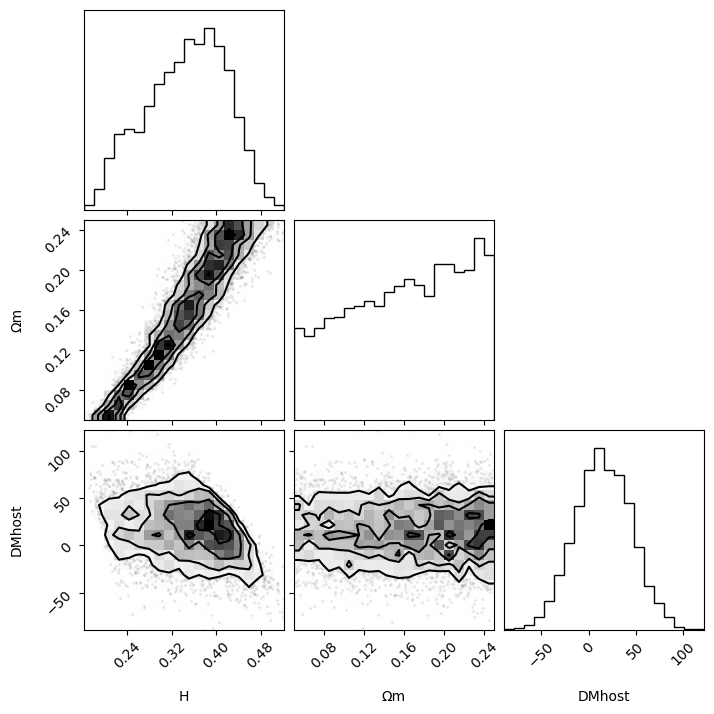

In [9]:
import corner

fig = corner.corner(flat_samples, labels=["H","Ωm","DMhost"] )
plt.show

In [37]:
#mock data for DM and z
z_array=np.linspace(0.01,1,50)
pdfn=(z_array**2)* np.exp(-4.*z_array)
pdfn=pdfn/(sum(pdfn))
z=np.random.choice(z_array,size=50, p=pdfn) 



DMo=[]
for i in range(0,len(z_array)):
    Omega_m=0.143
    z1=z[i]
    DMo.append(DMLSS(z1,h,H0,Omega_m)+np.random.normal(loc=0,scale=sigma(z1)))

In [43]:
#Doing MCMC sampling for mock data

import emcee

pos = (0.64,0.143,500)+[0.01,0.001,5]*np.random.randn(25,3)
no_of_walkers, dm=pos.shape
sampler=emcee.EnsembleSampler(no_of_walkers, dm, log_probability, args=(z,h,DMo,Ωb) )
sampler.run_mcmc(pos,500,progress=True)

100%|████████████████████████████████████████████████████████████████████████████████████████| 500/500 [02:15<00:00,  3.69it/s]


State([[ 0.84258933  0.24872406 30.53204537]
 [ 0.50354117  0.08770444 21.13846411]
 [ 0.70904726  0.17420172 23.51376452]
 [ 0.68875497  0.16359257 15.11734844]
 [ 0.80335776  0.22139754 22.92239263]
 [ 0.68499846  0.16236214 19.58864047]
 [ 0.60732055  0.12605419 17.34277946]
 [ 0.76692053  0.20094363 13.87814671]
 [ 0.5662814   0.11583494 41.26038588]
 [ 0.56832968  0.11332294 29.66122057]
 [ 0.7693752   0.20518306 22.63299942]
 [ 0.76767329  0.20507738 23.67148615]
 [ 0.79728596  0.23152865 51.89531489]
 [ 0.80722229  0.22970595 32.85939035]
 [ 0.57540542  0.1181288  43.14287023]
 [ 0.79265752  0.2178632  23.73828193]
 [ 0.71551265  0.17769952 24.09704976]
 [ 0.82704128  0.23547256 21.04989234]
 [ 0.55238528  0.10459922 15.72680471]
 [ 0.74868653  0.2019864  43.90845863]
 [ 0.52484296  0.09524227 19.44608463]
 [ 0.69090386  0.16583073 27.78487821]
 [ 0.8292006   0.23581418 13.63224165]
 [ 0.7006569   0.16807421 15.89541766]
 [ 0.83830778  0.24507918 26.83575584]], log_prob=[-15284.

In [44]:
flat_samples = sampler.get_chain(discard=50, thin=15, flat=True)
print(flat_samples.shape)

(750, 3)


<function matplotlib.pyplot.show(close=None, block=None)>

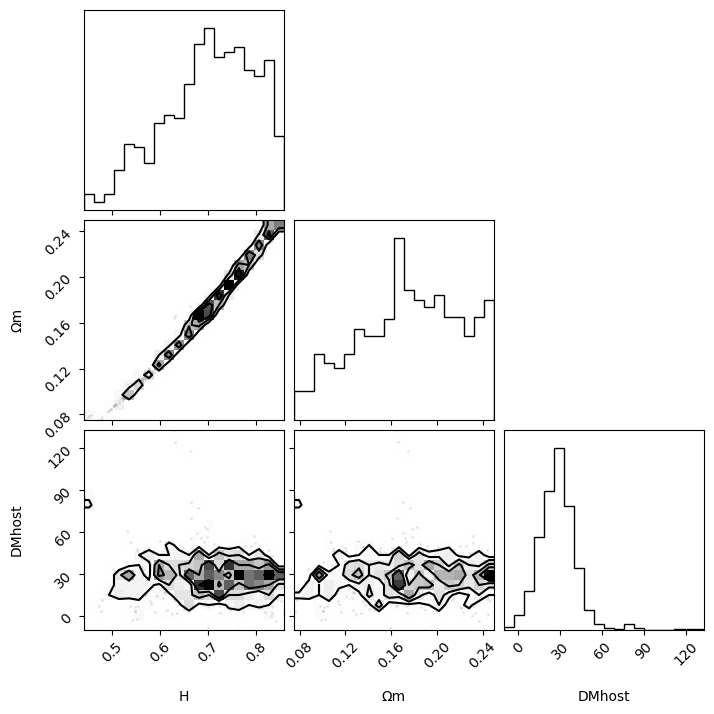

In [45]:
import corner

fig = corner.corner(flat_samples,labels=["H","Ωm","DMhost"] )
plt.show